In [111]:
%run code/import_libs.py
%run code/functions.py
#%run code/functions.py
%run code/Build_Forms.py
%run code/initial_data_prep.py

%matplotlib inline

#df['view'] = np.where (df['view'] == 'FAIR', 'AVERAGE', df['view'])
#df['view'].fillna(value='AVERAGE',inplace=True)
#df['view2']=df['view'].astype('category')
#df['view2']=df['view2'].cat.reorder_categories(['NONE', 'AVERAGE', 'FAIR', 'GOOD', 'EXCELLENT'])


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 30)
pd.options.display.float_format = '{:,}'.format


df['view'].value_counts()

NONE         19018
AVERAGE        983
GOOD           624
FAIR           326
EXCELLENT      192
Name: view, dtype: int64

In [112]:
%run code/initial_data_prep.py
initial_pred = df.drop(columns=["price"]).copy()
initial_price = df[["price"]]

#FILTER

#df=df[df['yr_built']>1981]
df=df[df['price']<1000000].copy()
#df=df[df['sqft_living']<12000].copy()
#df=df[df['sqft_lot']<8000000].copy()
#df=df[~df["grade"].isin([3,4,5])]
df.shape

(19683, 28)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [114]:

x0_train, x0_test, y0_train, y0_test = train_test_split(initial_pred, initial_price, test_size=0.25)


#Transform the data
x1_train, y1_train = transform_data(x0_train, y0_train)
x1_test, y1_test = transform_data (x0_test, y0_test)

# Create OLS linear model
x, y = transform_data(initial_pred, initial_price)

pred=x
price=y
pred_int = sm.add_constant(pred)
model = sm.OLS(price,pred_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1961.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:46:03   Log-Likelihood:                 5390.9
No. Observations:               21143   AIC:                        -1.063e+04
Df Residuals:                   21068   BIC:                        -1.003e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.6419      0.032    239.196      0.000       7.579       7.705
sqft_living     0.4518      0.005     92.923      0.000       0.442       0.461
sqft_lot        0.0698      0.002     37.134      0.000       0.066       0.073
zip_98002       0.0179      0.017      1.074      0.283      -0.015       0.051
zip_98003       0.0192      0.015      1.268      0.205      -0.010       0.049
zip_98004       1.1630      0.015     79.314      0.000       1.134       1.192
zip_98005       0.7598      0.018     42.888      0.000       0.725       0.795
zip_98006       0.6770      0.013     51.068      0.000       0.651       0.703
zip_98007       0.6721      0.019     35.683      0.000       0.635       0.709
zip_98008       0.6700      0.015     44.454      0.000       0.640       0.700
zip_98010       0.2530      0.022     11.761      0.000       0.211       0.295
zip_98011       0.4593      0.017     27.236      0.000       0.426       0.492
zip_98014       0.2941      0.020     14.807      0.000       0.255       0.333
zip_98019       0.3238      0.017     19.073      0.000       0.290       0.357
zip_98022       0.0675      0.016      4.205      0.000       0.036       0.099
zip_98023      -0.0264      0.013     -2.008      0.045      -0.052      -0.001
zip_98024       0.4214      0.024     17.900      0.000       0.375       0.468
zip_98027       0.5312      0.014     38.562      0.000       0.504       0.558
zip_98028       0.4207      0.015     27.859      0.000       0.391       0.450
zip_98029       0.6323      0.015     42.807      0.000       0.603       0.661
zip_98030       0.0591      0.016      3.804      0.000       0.029       0.090
zip_98031       0.0891      0.015      5.836      0.000       0.059       0.119
zip_98032      -0.0193      0.020     -0.983      0.326      -0.058       0.019
zip_98033       0.8145      0.014     60.027      0.000       0.788       0.841
zip_98034       0.5525      0.013     42.866      0.000       0.527       0.578
zip_98038       0.1899      0.013     14.933      0.000       0.165       0.215
zip_98039       1.3601      0.029     47.263      0.000       1.304       1.416
zip_98040       0.9289      0.015     60.946      0.000       0.899       0.959
zip_98042       0.0855      0.013      6.656      0.000       0.060       0.111
zip_98045       0.3045      0.016     18.680      0.000       0.273       0.337
zip_98052       0.6542      0.013     51.039      0.000       0.629       0.679
zip_98053       0.6030      0.014     43.663      0.000       0.576       0.630
zip_98055       0.1614      0.015     10.517      0.000       0.131       0.192
zip_98056       0.3552      0.014     25.886      0.000       0.328       0.382
zip_98058       0.1740      0.013     12.974      0.000       0.148       0.200
zip_98059       0.3723      0.013     27.92

In [115]:
abs_test_results=[]
test_results=[]
test_rmse_results=[]

for i in range(50):
    
    x0_train, x0_test, y0_train, y0_test = train_test_split(initial_pred, initial_price, test_size=0.3)

    #Transform the data
    x1_train, y1_train = transform_data(x0_train, y0_train)
    x1_test, y1_test = transform_data (x0_test, y0_test)

    linreg = LinearRegression()
    linreg.fit(x1_test, y1_test)

    y1_test_pred = linreg.predict(x1_test)
    
    y1_test_pred=np.exp(y1_test_pred)
    test_mse = mean_squared_error(y0_test, y1_test_pred)
    
    test_rmse_results.append(np.sqrt(test_mse))
    
    miss = np.mean((y1_test_pred-y0_test)/y0_test)[0]
    miss_abs = np.mean(np.abs((y1_test_pred-y0_test)/y0_test))[0]
    
     
    test_results.append(miss)
    abs_test_results.append(miss_abs)
    

avg_miss=sum(test_results)/len(test_results)*100
avg_miss_abs=sum(abs_test_results)/len(abs_test_results)*100
avg_rmse=sum(test_rmse_results)/len(test_rmse_results)

print ( str(round(avg_miss,3))+'%', str(round(avg_miss_abs,3))+'%', round(avg_rmse,2))


1.79% 14.074% 131998.82


In [105]:

np.mean(cross_val_score(linreg, x1_test, y1_test, cv=20, scoring='r2'))    
    



-1.3257599282719184e+20

In [106]:
coef_df=model.params.reset_index()
coef_df.columns=["Column","Value"]

def calculate_price (sqft_living, yr_built, zipcode, grade, waterfront, view , sqft_lot, coef_df=coef_df):
    if view == '-':
        view='NONE'

    if waterfront:
        waterfront='WATERFRONT'
    else:
        waterfront='NONE'

    b0,b1,b2,b3,b4,b5,b6,b7 = get_coeff( yr_built,zipcode,grade, waterfront, view, coef_df)
    y=round( np.exp(b0 + b1*np.log(sqft_living) + b2 + b3 + b4 + b5 + b6 + b7*np.log(sqft_lot)) )

    print(y)
    return y,b0,b1,b2,b3,b4,b5,b6,b7


In [107]:
abs_test_results=[]
test_results=[]

df=pd.concat([x0_test, y0_test], axis=1)
for i in range(100):
    X=np.array(df[['sqft_living','yr_built','zipcode','grade','waterfront','view', 'sqft_lot','price']].sample())[0]
    sqft_living,year,zipcode,grade,water,view,sqft_lot,price=X

    b0,b1,b2,b3,b4,b5,b6,b7 = get_coeff( year=year, zipcode=zipcode, grade=grade, water=water, view=view, coef_df=coef_df)
    y=round( np.exp(b0 + b1*np.log(sqft_living) + b2 + b3 + b4 + b5 + b6 + b7*np.log(sqft_lot)) )
   
    miss_abs= np.abs(100-(y/price*100))
    miss= 100-(y/price*100)
    test_results.append(miss)
    abs_test_results.append(miss_abs)

avg_miss=sum(test_results)/len(test_results)
avg_miss_abs=sum(abs_test_results)/len(abs_test_results)
print (avg_miss, avg_miss_abs)


-2.1705532164821677 14.322622704862349


In [108]:
b0,b1,b2,b3,b4,b5,b6,b7 

(9.077227676649315,
 0.44362602657276695,
 -0.07642350929241937,
 0.7512264335079079,
 -0.20990967632608903,
 0,
 -0.11726537880438312,
 0.07694676203490741)

In [109]:
title=form_items[0].children[0]
zipW=form_items[1].children[1]
yearW=form_items[1].children[2]
gradeW=form_items[2].children[1]
livingW=form_items[3].children[1]
lotW=form_items[4].children[1]
viewW=form_items[5].children[1]
waterW=form_items[5].children[2]
#buttonW=form_items[5].children[0]


In [110]:
output = widgets.interactive_output(calculate_price, {
    'zipcode': zipW, 'yr_built':yearW, 'grade':gradeW,
    'sqft_living':livingW,'sqft_lot':lotW,'view':viewW,'waterfront':waterW } )

      
ui = widgets.VBox([form, output])

output.layout={'border': '3px solid green', 'width':'150px'}

display(ui)


In [43]:
b0,b1,b2,b3,b4,b5,b6,b7
#X

(9.082349726295199,
 0.44352789547964555,
 -0.1256386129461151,
 0.4345331625806958,
 -0.3334980925916291,
 0,
 -0.121893621724189,
 0.07689132057045402)

In [363]:



cv_20_results = np.mean(cross_val_score(linreg, x1_train, y1_train, cv=20, scoring='neg_mean_squared_error'))

In [364]:
cv_20_results 

-0.021273567369346942

<AxesSubplot:>

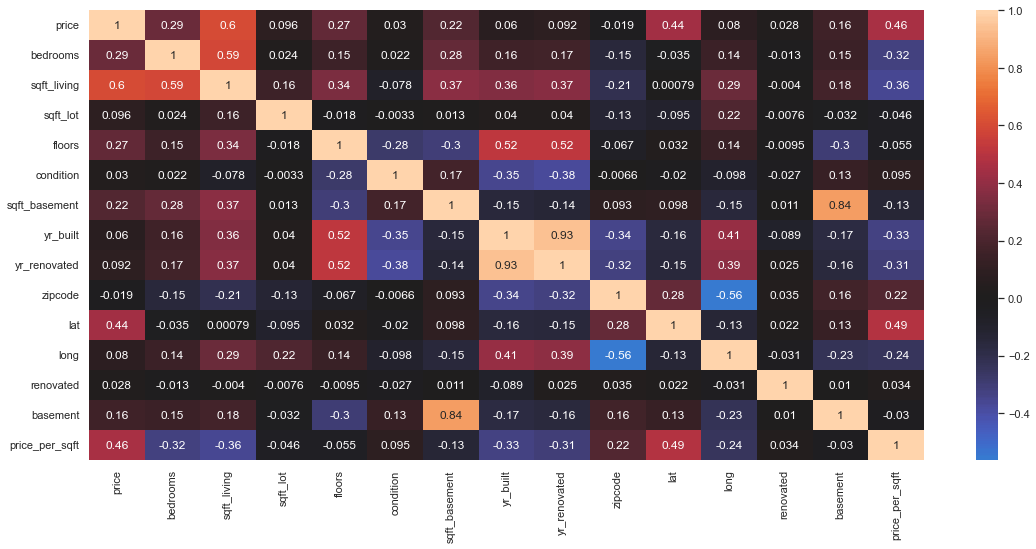

In [65]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.heatmap (df.drop(['sqft_above','grade','sqft_living15', 'sqft_lot15','bathrooms'], axis=1).corr(), annot=True, center=0)


In [365]:
np.exp(-0.021273567369346942)

0.9789511188519023